#**Atividades da Primeira Unidade de Sistemas Probabilísticos**
Aluno: Pedro Arthur Oliveira dos Santos


##**Atividade 1: Problema de Mounty-Hall**
No problema de mounty hall, o apresentador oferece 3 escolhas de porta para o jogador, onde duas contém um bóde, e uma contém um carro.
Se o jogador escolher a porta do carro e à manter até o final, ele vence e ganha o carro.

Existem duas rodadas, e pode ser escolhido carro ou bode em ambas, assim vamos definir esse sistema probabilístico a partir das portas como

$$
\Omega = \{\  C_1,B_1,C_2,B_2  \}\
$$


**$1^{-a}$ rodada**
O jogador escolhe uma das portas, a probabilidade dele escolher a porta que contém o carro é

$$
P(C_1) = \frac{1}{3}
$$

**$2^{-a}$ rodada**
Nesse rodada, o apresentador abre uma porta que contém um bode, e pergunta ao
jogador se ele quer manter ou trocar.

Se ele manter, então a probabilidade dele ganhar é a mesma da inicial

$$
P(C_2|\bar{T}) = P(C_1) = \frac{1}{3}
$$

que pode ser vista pela contagem dos eventos

$$
\begin{cases}
\{\ C_1C_2 \}\ \\
\{\ B_1B_2\}\ \\
\{\ B_1B_2 \}\
\end{cases}
$$

que seria a probabilidade dele ganhar inicialmente ao acaso.

Porém se ele trocar, temos três situações

$$
\begin{cases}
\{\ C_1B_2 \}\ \\
\{\ B_1C_2 \}\ \\
\{\ B_1C_2 \}\
\end{cases}
$$

onde $C_2$ seria a troca feita, assim então

$$
P(C_2|T) = \frac{2}{3}
$$

abaixo está feita a resolução computacional desse problema com simulações de monte carlo com as duas estratégias: Mantendo ou trocando.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def simular_monty_hall(estrategia):
    """
    Simulação de Monte Carlo Para o problema de Mounty Hall
    Args:
        estrategia (str): A estratégia do jogador, 'manter' ou 'trocar'.

    Returns:
        bool: True se o jogador vence, False caso contrário.
    """
    portas = [0, 1, 2]  # Usamos uma lista para as portas

    # Porta com carro
    porta_com_carro = random.choice(portas)

    # Escolha inicial do jogador
    porta_inicial = random.choice(portas)

    # Portas que o apresentador pode abrir
    # Ele não pode abrir a porta com o carro nem a porta escolhida pelo jogador
    portas_disponiveis_apresentador = []
    for porta in portas:
        if porta != porta_com_carro and porta != porta_inicial:
            portas_disponiveis_apresentador.append(porta)

    # Se a porta inicial for a do carro, o apresentador pode abrir qualquer uma das outras duas
    if not portas_disponiveis_apresentador:
        portas_disponiveis_apresentador = [porta for porta in portas if porta != porta_inicial]


    # Porta aberta pelo apresentador
    porta_aberta_apresentador = random.choice(portas_disponiveis_apresentador)

    # Decisão do jogador
    if estrategia == 'manter':
        escolha_final = porta_inicial
    elif estrategia == 'trocar':
        # A porta restante é a única que não foi a inicial nem a aberta pelo apresentador
        porta_restante = []
        for porta in portas:
            if porta != porta_inicial and porta != porta_aberta_apresentador:
                porta_restante.append(porta)
        escolha_final = porta_restante[0]
    else:
        raise ValueError("Estratégia inválida. Escolha 'manter' ou 'trocar'.")

    # Determinar se o jogador venceu
    return escolha_final == porta_com_carro


#Fazendo para 1 milhão de simulações
num_simulacoes = int(1e6)

vitorias_mantendo = 0
vitorias_trocando = 0

for _ in range(num_simulacoes):
    if simular_monty_hall('manter'):
        vitorias_mantendo += 1

for _ in range(num_simulacoes):
    if simular_monty_hall('trocar'):
        vitorias_trocando += 1

prob_mantendo_lista = (vitorias_mantendo / num_simulacoes) * 100
prob_trocando_lista = (vitorias_trocando / num_simulacoes) * 100

print("--- Resultados da Simulação de Monty Hall ---")
print(f"Número de simulações: {num_simulacoes}")
print("-" * 60)
print(f"Probabilidade de ganhar mantendo a porta: {prob_mantendo_lista:.2f}%")
print(f"Probabilidade de ganhar trocando de porta: {prob_trocando_lista:.2f}%")



--- Resultados da Simulação de Monty Hall ---
Número de simulações: 1000000
------------------------------------------------------------
Probabilidade de ganhar mantendo a porta: 33.36%
Probabilidade de ganhar trocando de porta: 66.64%


##**Atividade 2: Histograma e Distribuições de Probabilidade**
Muitas vezes modelamos a distribuição de um problema como funções de variáveis aleatórias ou a partir de uma distribuição a posteriori, e precisamos testar se nossa modelagem realmente foi precisa.
Para isso, uma ferramenta estatística muito utilizada é o histograma, que a partir de um dado experimento, faz um gráfico de frequência versus intervalos de valores, que são chamados de bins.
Esse gráfico, se aproxima da densidade de probabilidade da variável aleatória analisada, e pode caracterizá-la e servir como validação da modelagem feita.

Porém o histograma é discreto e pode ter valores diferentes dependendo da largura de intervalo definida.
Uma abordagem util para transformar o histograma em uma distribuição de probabilidade, é normaliza-lo.
Considere um histograma como sendo um  vetor $$\vec{h}$$ que contém as alturas dos retângulos, a área total do gráfico é dada pela soma das áreas dos retângulos, e considerando as larguras iguais, temos

$$
A = \sum_{i = 0}^{N-1} h_i \Delta x =\Delta x \sum_{i = 0}^{N-1} h_i
$$
  
dividindo essa equação por $N \Delta x$, temos

$$
\bar{A}  =\frac{1}{N \Delta x} \Delta x \sum_{i = 0}^{N-1} h_i = \sum_{i = 0}^{N-1} \frac{h_i}{N}
$$

e se $h_i$ são as frequências dos valores da distribuição estarem no intervalo $i$, quando dividimos por N, e o N é muito grande, esse valores se aproximam da probabilidade, dessa maneira:

$$
\bar{A}  = \sum_{i = 0}^{N-1} \frac{h_i}{N} \approx \sum_{i = 0}^{N-1} p_i = 1
$$

então precisamos normalizar o histograma pelo fator $N \Delta x$.

##**Exemplo Distribuição Normal**
Considerando uma distribuição gaussiana, sua densidade é

$$
f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

com

$$
\begin{cases}
\mu = 5 \\
\sigma = 2
\end{cases}
$$

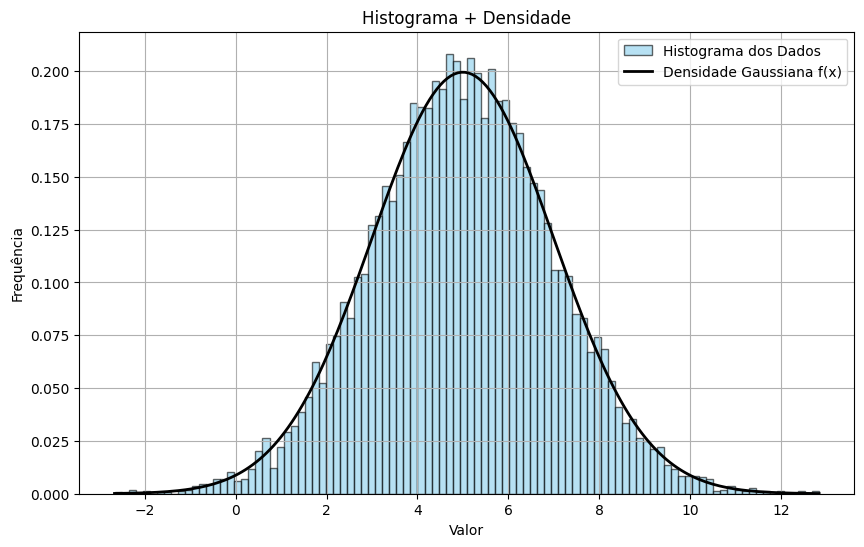

In [ ]:
def f_x_gaussiana(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

N = 10000
mu = 5
std = 2
dados = (mu + std*np.random.randn(N))


bins = int(100)
delta_x = (max(dados) - min(dados))/bins



#Divisão Pelos pesos para o histograma acompanhar a densidade, que é basicamente dividir todo mundo pela constante de normalização
weights = np.ones_like(dados)*1/(N*delta_x)


plt.figure(figsize=(10, 6))
contagens, bins, patches = plt.hist(dados, bins=bins, alpha=0.6, color='skyblue', weights = weights, edgecolor='black', label="Histograma dos Dados")


plt.grid()


# Construindo o gráfico da distribuição
x = np.linspace(min(bins), max(bins), 200)
f_x = f_x_gaussiana(x,mu,std)


# Plotando a distribuição junto com o histograma
plt.plot(x, f_x, 'k-', linewidth=2, label="Densidade Gaussiana f(x)")


plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.title("Histograma + Densidade")

plt.legend()
plt.show()

##**Exemplo Distribuição Uniforme**
Considerando uma distribuição uniforme, sua densidade é dada por

$$
f_X(x) = \begin{cases}
 \frac{1}{b-a}, se  a \leq x \leq b \\
  0, c.c
\end{cases}
$$

com

$$
\begin{cases}
a = 1 \\
b = 10
\end{cases}
$$

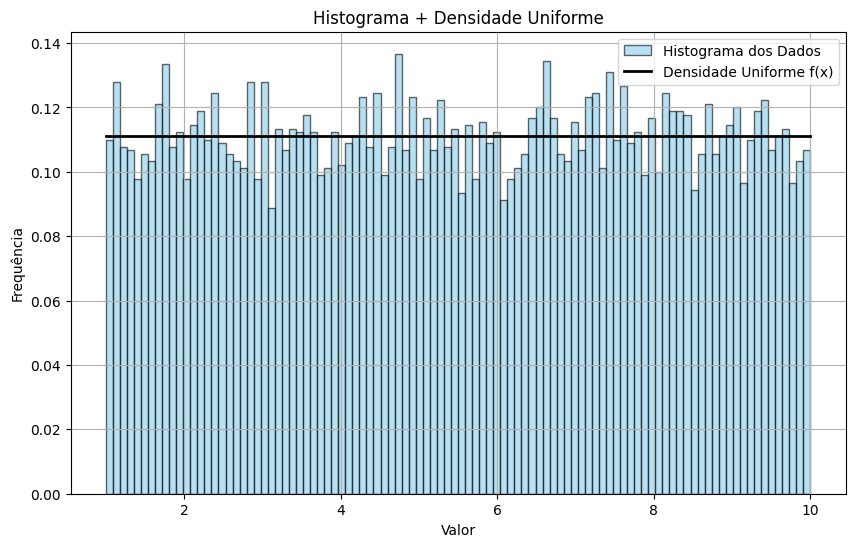

In [ ]:
def uniforme_distribution(x,a,b):
    f_x = np.zeros(len(x))
    for i in range(len(x)):
      if x[i] >= a and x[i] < b:
          f_x[i] = 1/(b-a)
    return f_x

N = 10000

a = 1
b = 10

bins = int(100)
dados_uniforme = np.random.rand(N)*(b-a) + a #+ np.random.randn(N)*0.4


delta_x = (max(dados_uniforme) - min(dados_uniforme))/bins

#Divisão Pelos pesos para o histograma acompanhar a densidade, que é basicamente dividir todo mundo pela constante de normalização
weights = np.ones_like(dados_uniforme)*1/(N*delta_x)

plt.figure(figsize=(10, 6))
contagens, bins, patches = plt.hist(dados_uniforme, bins=bins, alpha=0.6, color='skyblue', weights = weights, edgecolor='black', label="Histograma dos Dados")


plt.grid()


# Construindo o gráfico da densidade
x = np.linspace(min(bins), max(bins), 200)
f_x = uniforme_distribution(x,a,b)


# Plotando a densidade junto com o histograma
plt.plot(x, f_x, 'k-', linewidth=2, label="Densidade Uniforme f(x)")


plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.title("Histograma + Densidade Uniforme")

plt.legend()
plt.show()

##**Distribuição de Laplace**
A distribuição de laplace também é fundamental nos contextos de muitas aplicações, seja uma variável aleatória $X$ ~ $L(\mu, b)$, sua densidade é dada por

$$
f_X(x) = \frac{1}{b} e^{\frac{-|x - \mu|}{2b} }
$$

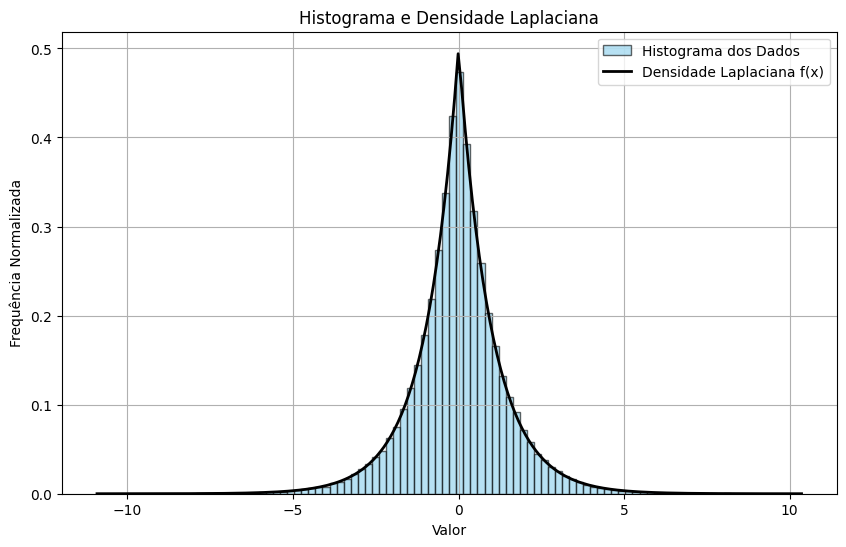

In [ ]:
def f_laplace(x,mu,b):
    return (1/(2*b))*np.exp(-np.abs(x - mu)/(b))



# Gerar dados com distribuição Chi-Quadrado
N = 100000 # Aumentei o número de amostras
mu = 0
b = 1
dados_laplace = np.random.laplace(loc = mu, scale = b, size = N)

bins = int(100)

delta_x = (max(dados_laplace) - min(dados_laplace))/bins


#Divisão Pelos pesos para o histograma acompanhar a densidade, que é basicamente dividir todo mundo pela constante de normalização
weights = np.ones_like(dados_laplace)*1/(N*delta_x)

plt.figure(figsize=(10, 6))
contagens, bins, patches = plt.hist(dados_laplace, bins=bins, alpha=0.6, color='skyblue', weights = weights, edgecolor='black', label="Histograma dos Dados")


plt.grid()


# Construindo o gráfico da densidade
# Ajustando o linspace para começar de um valor pequeno positivo para evitar a assíntota
x = np.linspace(np.min(bins), np.max(bins), 200)
f_x = f_laplace(x,mu,b)


# Plotando a densidade junto com o histograma
plt.plot(x, f_x, 'k-', linewidth=2, label="Densidade Laplaciana f(x)")


plt.xlabel("Valor")
plt.ylabel("Frequência Normalizada")
plt.title("Histograma e Densidade Laplaciana")
plt.legend()
plt.show()

##**Exemplo Distribuição Chi-Square com $k = 1$**
Esse tipo de distribuição ocorre quando temos uma variável aleatória gaussiana $X$, e seja uma variável aleatória $Y$, cuja relação é dada por

$$
Y = X^2
$$

se quisermos obter a distribuição de probabilidade $F_Y(y)$ podemos usar manipulação de variáveis aleatórias, então temos

$$
P(Y \leq y) = F_Y(y) = P(X^2 \leq y)
$$

onde $X^2 \leq y$ pode ser vista como uma região no gráfico $Y = X^2$, assim, podemos calcular essa região baseado na função inversa, ou seja

$$
(X^2 \leq y) = (X \leq \pm \sqrt{y}) = -\sqrt{y} \leq X \leq \sqrt{y}
$$

então agora temos

$$
F_Y(y) = P(-\sqrt{y} \leq X \leq \sqrt{y}) = F_X(\sqrt{y}) - F_X(-\sqrt{y})
$$

ainda se $F_X$ for par, como é o caso da gaussiana, temos ainda

$$
F_y(y) = 2F_X(\sqrt{y})
$$

e a densidade de probabilidade é dada pela derivada dessa função em relação a y, assim

$$
f_Y(y) = \frac{d}{dy} 2F_X(\sqrt{y}) = \frac{d}{du} 2F_X(u) \frac{du}{dy} = \frac{f_X(\sqrt{y})}{\sqrt{y}}
$$

e a densidade gaussiana é dada por

$$
f_X(x) = \frac{e^{\frac{-(x - \mu)^2}{2\sigma^2}}}{\sqrt{2 \pi} \sigma}
$$

assim temos finalmente, considerando $\mu  = 0$ e $\sigma = 1$

$$
f_Y(y) = \frac{e^{\frac{-y}{2}}}{\sqrt{2 \pi y}}
$$


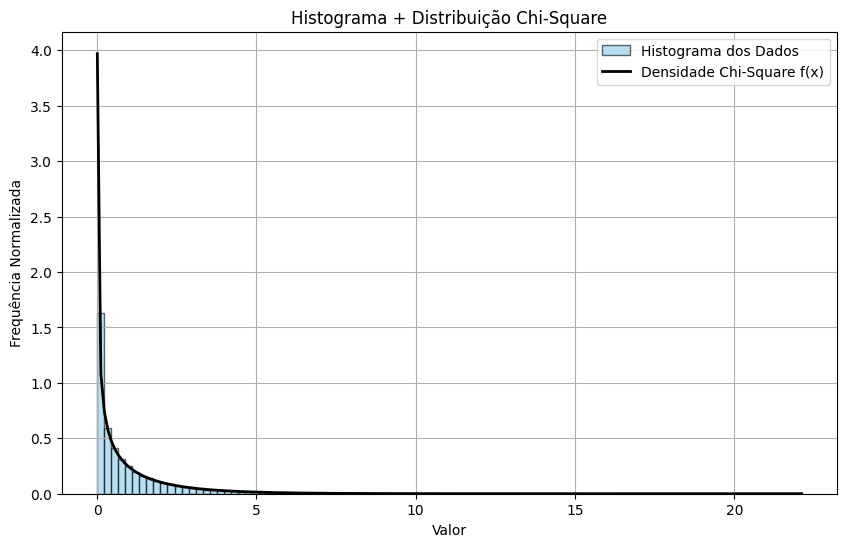

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma # Import gamma function
from scipy.stats import chi2 # Import chi2 from scipy.stats

def chi_2(x):
    # Use np.where para aplicar a condição a cada elemento do array
    return np.where(x > 0, np.exp(-x/2)/np.sqrt(2*np.pi*x), 0)


# Definir a ordem
k = 1

# Gerar dados com distribuição Chi-Quadrado
N = 100000 # Aumentei o número de amostras

dados_chi2 = np.random.chisquare(k, N)

bins = int(100)

delta_x = (max(dados_chi2) - min(dados_chi2))/bins

#Divisão Pelos pesos para o histograma acompanhar a densidade, que é basicamente dividir todo mundo pela constante de normalização
weights = np.ones_like(dados_chi2)*1/(N*delta_x)

plt.figure(figsize=(10, 6))
contagens, bins, patches = plt.hist(dados_chi2, bins=bins, alpha=0.6, color='skyblue', weights = weights, edgecolor='black', label="Histograma dos Dados")


plt.grid()


# Construindo o gráfico da distribuição
# Ajustando o linspace para começar de um valor pequeno positivo para evitar a assíntota
x = np.linspace(0.01, np.max(bins), 200)
f_x = chi_2(x)


# Plotando a distribuição junto com o histograma
plt.plot(x, f_x, 'k-', linewidth=2, label="Densidade Chi-Square f(x)")


plt.xlabel("Valor")
plt.ylabel("Frequência Normalizada")
plt.title("Histograma + Distribuição Chi-Square")

plt.legend()
plt.show()

##**Atividade 4: Problema 205 Project Euler**
Peter tem nove dados de 4 lados(piramidal), cada um com faces numeradas de 1 a 4. \
Colin tem seis dados de seis lados(cubico), cada um com faces numeradas de 1 a 6. \
Peter e Colin rolam seus dados e comparam o total: o maior número de vitórias. O resultado é empate se os totais são iguais.
\
Qual a probabilidade que o dado piramidal de peter ganhe do cubico de colin? dê
sua resposta com um arredondamento de 7 casas decimais na forma 0.abcdefg

Definindo a variável aleatória $X$ como a soma das variáveis aleatórias do resultado de cada lançamento do dado piramidal, ao todo 9, e $Y$ como a soma de variáveis aleatórias do resultado de cada lançamento do dado cubico, ao todo 6

$$
X = \sum_{i = 1}^{9} X_i
$$

$$
Y = \sum_{i = 1}^{6} Y_i
$$

e as distribuições $X_i$ e $Y_i$ são dadas por:

$$
f_{X_i}(x_i) = [\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4} ]
$$

e para o dado de Colin:

$$
f_{Y_i}(y_i) = [\frac{1}{6}, \frac{1}{6}, \frac{1}{6}, \frac{1}{6}, \frac{1}{6}, \frac{1}{6} ]
$$

, temos que suas densidades de probabilidade são dadas por convoluções sucessivas, uma vez que elas representam uma soma de variáveis aleatórias.

$$
f_X(x) = f_{X_1} \ast f_{X_2} \ast ... \ast f_{X_9} (x)
$$

$$
f_Y(y) = f_{Y_1} \ast f_{Y_2} \ast ... \ast f_{Y_6} (y)
$$

então o procedimento de resolução se resume a calcular

$$
P(X>Y) = \sum_{x}^{} \sum_{ y = y | x > y}^{} f_{XY}(x,y)
$$

considerando ainda a independência

$$
P(X>Y) = \sum_{x = 9}^{36} \sum_{ y = y | x > y}^{} f_{X}(x) f_{Y}(y)
$$

sabendo que a soma mínima para o dado de peter é 9 e a soma mínima pro dado de
colin é 4.


In [ ]:
f_x_i = [1/4, 1/4, 1/4, 1/4]
f_y_i = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

f_x = f_x_i
f_y = f_y_i

# Convolve 8 times for 9 dice
for i in range(8):
    f_x = np.convolve(f_x, f_x_i)

# Convolve 5 times for 6 dice
for i in range(5):
    f_y = np.convolve(f_y, f_y_i)

# j = soma do dado piramidal
# l = soma do dado cubico
peter_ganha = 0

for l in range(len(f_y)):
    for j in range(len(f_x)):
        peter_sum = j + 9
        colin_sum = l + 6

        if peter_sum > colin_sum:
            peter_ganha += f_x[j] * f_y[l]



print(f'A probabilidade de peter ganhar é {peter_ganha:.7f}')

A probabilidade de peter ganhar é 0.5731441
